In [89]:
# Standard Imports
import numpy as np
import pandas as pd
import plotly.express as px

# Scikit-Learn Imports
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [90]:
df = pd.read_csv('Data/dwellings_ml.csv')
color_theme = px.colors.diverging.Portland

In [91]:
h_subset = df.filter(
    [
        "basement",
        "before1980",
        "finbsmnt",
        "livearea",
        "nocars",
        "numbaths",
        "numbdrm",
        "sprice",
        "stories",
        "yrbuilt",
    ]
).sample(500)

fig = px.scatter_matrix(
    h_subset,
    dimensions=["basement", "finbsmnt", "livearea", "sprice", "stories"],
    color="before1980",
    color_continuous_scale=color_theme,
    title="House Specifications & Sale Price",
    height=1000,
    width=1200,
    labels={
        "basement": "Total Basement (Ft²)",
        "finbsmnt": "Finished Basement (Ft²)",
        "livearea": "Living Space (Ft²)",
        "sprice": "Selling Price",
        "stories": "Stories",
    },
)

fig.update_coloraxes(colorbar_tickformat=".0%")
fig.update_layout(coloraxis_colorbar=dict(orientation='h'))
fig.update_traces(diagonal_visible=False)
fig.show()

In [92]:
corr = h_subset.drop(columns="before1980").corr()
fig = px.imshow(
    corr,
    text_auto=".1%",
    height=900,
    width=900,
    color_continuous_scale=color_theme,
    labels=dict(color="Correlation"),
    x=[
        "Basement",
        "Finished Basement",
        "Living Area",
        "Garage Size",
        "No. Bathrooms",
        "No. Bedrooms",
        "Selling Price",
        "Stories",
        "Year Built",
    ],
    y=[
        "Basement",
        "Finished Basement",
        "Living Area",
        "Garage Size",
        "No. Bathrooms",
        "No. Bedrooms",
        "Selling Price",
        "Stories",
        "Year Built",
    ],
)
fig.update_layout(
    title=dict(text="Before and After the 80's"),
    coloraxis_colorbar=dict(
        orientation="h"
    )
)

fig.update_coloraxes(colorbar_tickformat=".0%")
fig.show()

In [93]:
X_pred = df.drop(
    df.filter(regex="before1980|yrbuilt|parcel").columns, axis=1
)

y_pred = df.filter(regex="before1980")

X_train, X_test, y_train, y_test = train_test_split(
    X_pred, y_pred, test_size=0.30, random_state=75
)

In [94]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2618
           1       0.91      0.92      0.92      4256

    accuracy                           0.90      6874
   macro avg       0.89      0.89      0.89      6874
weighted avg       0.90      0.90      0.90      6874



In [95]:
df_features = pd.DataFrame(
    {"f_names": X_train.columns, "f_values": clf.feature_importances_}
).sort_values("f_values", ascending=False)

fig = px.bar(
    df_features.head(15),
    x="f_values",
    y="f_names",
    text_auto=".1%",
    width=1000,
    height=600,
    range_x=[0,0.3],
    title="Features",
    hover_data=[
        "f_names", "f_values"
    ]
)

fig.update_layout(
    yaxis={"categoryorder": "total ascending"},
    margin=dict(
        pad=0,
        l=20,
        r=20
    ),
    xaxis=dict(
        tickformat=".0%"
    )
)

labels = df_features["f_names"].values

fig.update_traces(
    texttemplate=labels,
    textposition="auto"
)

fig.update_xaxes(
    title="Feature Values"
)

fig.update_yaxes(
    title="Feature Name",
    visible=True,
    showticklabels=False
)

fig.show()

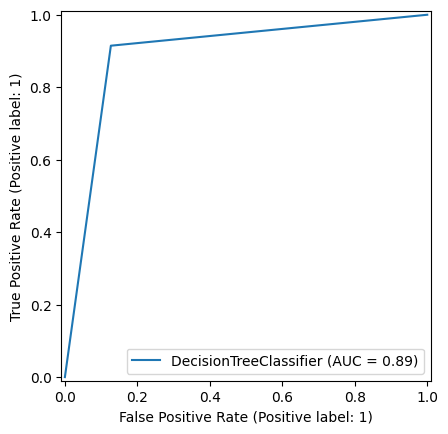

In [96]:
metrics.RocCurveDisplay.from_estimator(clf, X_test, y_test)